# Análisis de ventas y marketing de la empresa Showz


En este análisis para Showz, se evaluarán los patrones de uso del servicio por parte de los clientes, desde su primera interacción hasta la realización de compras, con el objetivo de optimizar los gastos de marketing. Se analizarán las visitas, los pedidos y los costos de adquisición para determinar cuándo los ingresos generados por cada cliente superan los gastos de marketing.


## Comenzamos el análisis accediendo y limpiando los datos.

Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Triple-Ten, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**.

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;



In [1]:
# Importamos las librerías necesarias

import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
# Importamos los datos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')


In [3]:
# Obtenemos información preliminar de los datos
print('')
print('Información del df visits')
display(visits.head())
print(visits.info())
print('')
print('Información del df orders')
display(orders.head())
print(orders.info())
print('')
print('Información del df costs')
display(costs.head())
print(costs.info())


Información del df visits


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

Información del df orders


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

Información del df costs


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


In [4]:
# Eliminamos espacios adicionales los nombres de las columnas
visits.columns = visits.columns.str.strip().str.replace(' ', '_').str.lower()
orders.columns = orders.columns.str.strip().str.replace(' ', '_').str.lower()
costs.columns = costs.columns.str.strip().str.replace(' ', '_').str.lower()

# Convertimos a snake_case los nombres de las columnas
visits.columns = visits.columns.str.replace('End Ts', 'end_ts').str.replace('Source Id', 'source_id').str.replace('Start Ts', 'start_ts').str.lower()
orders.columns = orders.columns.str.replace('Buy Ts', 'buy_ts').str.replace('dt', 'date').str.lower()
costs.columns = costs.columns.str.replace('dt', 'date')


print('Nombres de columnas del df visits:', visits.columns)
print('Nombres de columnas del df orders:', orders.columns)
print('Nombres de columnas del df costs:', costs.columns)


Nombres de columnas del df visits: Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Nombres de columnas del df orders: Index(['buy_ts', 'revenue', 'uid'], dtype='object')
Nombres de columnas del df costs: Index(['source_id', 'date', 'costs'], dtype='object')


In [5]:
# Comprobamos duplicados
print('Duplicados en visits:', visits.duplicated().sum())
print('Duplicados en orders:', orders.duplicated().sum())
print('Duplicados en costs:', costs.duplicated().sum())

# Comprobamos valores nulos
print('Valores nulos en visits:')
print(visits.isnull().sum())
print('')
print('Valores nulos en orders:')
print(orders.isnull().sum())
print('')
print('Valores nulos en costs:')
print(costs.isnull().sum())


Duplicados en visits: 0
Duplicados en orders: 0
Duplicados en costs: 0
Valores nulos en visits:
device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

Valores nulos en orders:
buy_ts     0
revenue    0
uid        0
dtype: int64

Valores nulos en costs:
source_id    0
date         0
costs        0
dtype: int64


In [6]:
# Convertimos las columnas de fechas a datetime
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['date'] = pd.to_datetime(costs['date'])


In [7]:
# Comprobamos el tipo de datos de las columnas
print(visits.dtypes)
print(orders.dtypes)
print(costs.dtypes)


device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object
buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object
source_id             int64
date         datetime64[ns]
costs               float64
dtype: object


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Todo está bien estructurado. La importación y limpieza de los datos están bien realizadas y los nombres de las columnas están estandarizados adecuadamente. ¡Buen trabajo!
</div>



### Conclusiones de la obtención y limpieza de los datos

Durante la importación y limpieza de los datos, se llevaron a cabo las siguientes acciones para asegurar que estuvieran listos para el análisis:

1. **Nombres de las columnas estandarizados**: 
   - Fue necesario ajustar los nombres de las columnas para seguir un formato coherente, utilizando **snake_case** y asegurando que todos estuvieran en minúsculas.
   - También se eliminaron espacios adicionales para evitar posibles errores al referenciar columnas.

2. **Transformación de datos de fechas**:
   - Se convirtieron los datos relacionados con fechas y horas al formato **datetime**.

3. **Comprobación de duplicados**:
   - Se realizó una verificación de duplicados en los DataFrames importados. No se encontraron registros duplicados significativos, por lo que no fue necesario eliminar filas duplicadas.

4. **Manejo de valores nulos**:
   - Se realizó un análisis de los valores nulos en las columnas relevantes. No se encontraron valores nulos.

5. **Consistencia en los tipos de datos**:
   - Se verificó que las columnas numéricas estuvieran correctamente tipificadas para evitar problemas con cálculos y agregaciones.
   
   
## Análisis de métricas

En este bloque se calcularán e informarán las métricas clave que ayudarán a comprender mejor el comportamiento de los usuarios en **Showz**. 

- Se analizarán las visitas diarias, semanales y mensuales, el número de sesiones, la duración de cada una y la frecuencia con la que los usuarios regresan al servicio. 

- Además, se investigarán los patrones de ventas, el ciclo de conversión de los usuarios y el valor que aportan a la empresa.

- Por último, se evaluará el rendimiento de las campañas de marketing, calculando el gasto total, el costo de adquisición de clientes y la rentabilidad de las inversiones (ROMI), con el objetivo de identificar las fuentes y dispositivos más efectivos a lo largo del tiempo.

### Visitas
#### ¿Cuántas personas lo usan por día, semana y mes?
Podemos agrupar los datos de visitas por fechas, contar cuántos usuarios únicos visitan el sitio en cada período (día, semana y mes) y calcular la media.

In [8]:
# Personas por día
users_per_day = visits.groupby(visits['start_ts'].dt.date)['uid'].nunique()
print(users_per_day)

# Calculamos la media de usuarios por día
mean_users_per_day = users_per_day.mean()
print("Media de usuarios por día:", mean_users_per_day)

# Personas por semana
users_per_week = visits.groupby(visits['start_ts'].dt.to_period('W'))['uid'].nunique()
print(users_per_week)

# Calculamos la media de usuarios por semana
mean_users_per_week = users_per_week.mean()
print("Media de usuarios por semana:", mean_users_per_week)

# Personas por mes
users_per_month = visits.groupby(visits['start_ts'].dt.to_period('M'))['uid'].nunique()
print(users_per_month)

# Calculamos la media de usuarios por mes
mean_users_per_month = users_per_month.mean()
print("Media de usuarios por mes:", mean_users_per_month)

start_ts
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, Length: 364, dtype: int64
Media de usuarios por día: 907.9917582417582
start_ts
2017-05-29/2017-06-04     2021
2017-06-05/2017-06-11     4129
2017-06-12/2017-06-18     2812
2017-06-19/2017-06-25     2878
2017-06-26/2017-07-02     3064
2017-07-03/2017-07-09     3294
2017-07-10/2017-07-16     4355
2017-07-17/2017-07-23     3841
2017-07-24/2017-07-30     2655
2017-07-31/2017-08-06     2364
2017-08-07/2017-08-13     2444
2017-08-14/2017-08-20     2746
2017-08-21/2017-08-27     3116
2017-08-28/2017-09-03     3694
2017-09-04/2017-09-10     4412
2017-09-11/2017-09-17     4319
2017-09-18/2017-09-24     4874
2017-09-25/2017-10-01     6241
2017-10-02/2017-10-08     7612
2017-10-09/2017-10-15     7074
2017-10-16/2017-10-22     7148
2017-10-23/2017-10-29     7401
2017-10-3

#### ¿Cuántas sesiones hay por día?
Para saber cuántas sesiones hay por día, podemos agrupar las visitas por fecha y contar el número de sesiones.

In [9]:
# Sesiones por día
sessions_per_day = visits.groupby(visits['start_ts'].dt.date)['uid'].count()
print(sessions_per_day)


start_ts
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Name: uid, Length: 364, dtype: int64


#### ¿Cuál es la duración de cada sesión?

In [10]:
# Calculamos la duración de cada sesión
visits['session_duration'] = visits['end_ts'] - visits['start_ts']

# Convertimos la duración a segundos para un análisis más fácil
visits['session_duration_seconds'] = visits['session_duration'].dt.total_seconds()

# Mostrar la duración promedio de las sesiones
average_session_duration = visits['session_duration_seconds'].mean()
print("Duración promedio de cada sesión en segundos:", average_session_duration)


Duración promedio de cada sesión en segundos: 643.0256872565387


#### ¿Con qué frecuencia los usuarios regresan?
Para calcular la frecuencia con la que los usuarios regresan, podemos contar el número de visitas por usuario y ver cuántos usuarios regresan después de su primera visita.

In [11]:
# Contamos el número de visitas por usuario
user_visits_count = visits.groupby('uid')['start_ts'].count()

# Ver la distribución de la frecuencia de visitas (cuántos usuarios regresan varias veces)
user_visit_distribution = user_visits_count.value_counts()
print(user_visit_distribution)


1      176041
2       30926
3       10184
4        4357
5        2283
        ...  
190         1
188         1
314         1
309         1
255         1
Name: start_ts, Length: 145, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
El análisis de visitas está bien realizado. Has agrupado los datos de manera efectiva y proporcionado un enfoque claro para calcular la media de usuarios, sesiones y duración de las sesiones. ¡Excelente trabajo!
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Considera usar gráficos para visualizar los datos de usuarios y sesiones por día, semana y mes. Esto facilitaría la interpretación de los resultados. Además, podrías encapsular algunos de estos cálculos en funciones para mejorar la claridad del código.
</div>


### Ventas
#### ¿Cuándo empieza la gente a comprar?
Aquí se trata de calcular el tiempo que transcurre entre el registro (``visits``) y la primera compra de cada usuario. Para hacer esto, podemos restar la fecha de la primera compra de la fecha de la primera visita para cada usuario. Luego, agrupamos estos resultados en categorías como ``Conversion 0d``, ``Conversion 1d``, etc.

In [12]:
# Unimos los DataFrames visits y orders por 'uid' (usuario) para obtener las fechas de la primera compra
merged_data = pd.merge(visits[['uid', 'start_ts']], orders[['uid', 'buy_ts']], on='uid', how='inner')

# Agrupamos por usuario y calcular el tiempo entre la primera visita y la compra
merged_data['conversion_time'] = (merged_data['buy_ts'] - merged_data['start_ts']).dt.days

# Crear una columna con categorías basadas en el tiempo de conversión
merged_data['conversion_category'] = pd.cut(merged_data['conversion_time'], 
                                            bins=[-1, 0, 1, 7, 30, 90, 365],
                                            labels=['Conversion 0d', 'Conversion 1d', 'Conversion 1w', 'Conversion 1m', 'Conversion 3m', 'Conversion 1y'])

# Ver la distribución de las conversiones por categoría
conversion_distribution = merged_data['conversion_category'].value_counts().sort_index()
print(conversion_distribution)


Conversion 0d     53424
Conversion 1d      6922
Conversion 1w     28811
Conversion 1m     70292
Conversion 3m    110544
Conversion 1y    123911
Name: conversion_category, dtype: int64


#### ¿Cuántos pedidos hacen durante un período de tiempo dado?
Para saber cuántos pedidos hace cada usuario, podemos agrupar los datos de pedidos por usuario y calcular el número de compras que han hecho en un período específico, por ejemplo, durante un mes o un año.

In [13]:
# Agrupamos por usuario y contar el número de pedidos
orders_per_user = orders.groupby('uid')['buy_ts'].count()

# Ver la distribución de pedidos por usuario
print(orders_per_user.describe())

# También se puede agrupar por mes para ver los pedidos en un período de tiempo específico
orders_per_month = orders.groupby(orders['buy_ts'].dt.to_period('M'))['buy_ts'].count()
print(orders_per_month)


count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: buy_ts, dtype: float64
buy_ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
2018-06       1
Freq: M, Name: buy_ts, dtype: int64


#### ¿Cuál es el tamaño promedio de compra?
Para calcular el tamaño promedio de compra, podemos calcular el promedio de la columna revenue en el DataFrame de pedidos (``orders``).

In [14]:
# Calculamos el tamaño promedio de compra
average_order_value = orders['revenue'].mean()
print("Tamaño promedio de compra:", average_order_value)


Tamaño promedio de compra: 4.999646930477041


#### ¿Cuánto dinero traen? (LTV - Lifetime Value)
El LTV (Lifetime Value) se refiere al valor total que un cliente ha generado durante toda su vida como cliente. Para calcular el LTV, necesitamos sumar los ingresos (``revenue``) por usuario y luego tomar el promedio de estos valores por cliente.

In [28]:
# Calculamos el LTV por usuario (sumar todas las compras de cada usuario)
ltv_per_user = orders.groupby('uid')['revenue'].sum()

# Calculamos el LTV promedio
average_ltv = ltv_per_user.mean()
print("LTV promedio:", average_ltv)

# Mostrar el LTV por meses para verlo mejor
# Unimos orders con visits para obtener el source_id (fuente de adquisición)
merged_orders = pd.merge(orders, visits[['uid', 'source_id']], on='uid', how='left')

# Calculamos la primera compra de cada usuario
merged_orders['first_purchase'] = merged_orders.groupby('uid')['buy_ts'].transform('min')

# Calculamos el "age" en meses (diferencia entre la compra actual y la primera compra)
merged_orders['age'] = ((merged_orders['buy_ts'] - merged_orders['first_purchase']) / pd.Timedelta(30, unit='D')).astype(int)

# Creamos la tabla dinámica (pivot table) con source_id en las filas y age en las columnas
ltv_pivot = pd.pivot_table(merged_orders, 
                           index='source_id',          # Filas por fuente de adquisición
                           columns='age',              # Columnas por "age" en meses
                           values='revenue',           # Usar revenue para LTV
                           aggfunc='sum',              # Sumar los ingresos por cohort
                           fill_value=0)               # Rellenar con 0 donde no hay ingresos


display(ltv_pivot)


LTV promedio: 6.901327930345262


age,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,495242.71,242318.00,232113.72,231529.88,137646.44,199485.83,192187.02,115507.85,139303.17,149360.17,118920.89,41402.22,3182.27
2,506144.72,244286.30,652840.19,307870.31,220446.09,127853.85,189787.33,135775.49,106819.56,72802.06,40617.28,32268.21,677.82
3,118572.01,24936.14,51269.79,23236.38,15160.17,14199.95,16532.61,9194.52,7643.72,6660.69,8386.77,822.86,72.35
4,182480.00,34819.27,57818.44,71211.30,32700.74,32690.44,25991.69,16255.83,14366.69,14558.89,9996.61,3203.10,597.17
5,192448.23,104924.30,292658.24,154657.65,127934.01,63432.06,70272.50,48188.43,60087.61,41746.28,16730.74,8077.87,319.22
7,1.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,22134.91,3298.84,2328.39,1456.91,1254.65,821.43,1775.57,1023.41,957.35,997.11,93.36,115.99,84.33
10,10220.05,544.39,933.96,336.09,286.30,234.93,71.59,144.08,221.95,503.10,139.04,982.77,0.98


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
El análisis de ventas está bien estructurado. Has implementado correctamente el cálculo del tiempo de conversión y las categorías, lo que facilita la interpretación de los datos. Además, la metodología para calcular el LTV es clara y efectiva. ¡Gran trabajo!
</div>


### Marketing
#### ¿Cuánto dinero se gastó? (Total, por fuente de adquisición y a lo largo del tiempo)
Para esto, utilizaremos el DataFrame de costos (``costs``), que contiene información sobre el gasto total y desglosado por fuente de adquisición y por período de tiempo.

a) Total gastado:

In [16]:
# Calculamos el gasto total en marketing
total_spent = costs['costs'].sum()
print("Total gastado en marketing:", total_spent)

Total gastado en marketing: 329131.62


b) Gastos por fuente de adquisición:

In [17]:
# Agrupamos por fuente de adquisición y sumar los costos
costs_by_source = costs.groupby('source_id')['costs'].sum()
print("Gasto por fuente de adquisición:")
print(costs_by_source)

Gasto por fuente de adquisición:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


c) Gastos a lo largo del tiempo:

In [18]:
# Agrupamos por mes para ver el gasto mensual
costs_by_month = costs.groupby(costs['date'].dt.to_period('M'))['costs'].sum()
print("Gasto mensual en marketing:")
print(costs_by_month)

Gasto mensual en marketing:
date
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64


#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? (CAC)
El Costo de Adquisición de Clientes (``CAC``) lo calculamos dividiendo el gasto en marketing por el número de clientes adquiridos (primeras compras) desde esa fuente.

In [19]:
# Unimos los DataFrames de visitas y pedidos por 'uid' para contar cuántos usuarios realizaron su primera compra desde cada fuente
merged_visits_orders = pd.merge(visits[['uid', 'source_id']], orders[['uid', 'buy_ts']], on='uid')

# Agrupamos por 'source_id' y contar el número de clientes adquiridos (usuarios que realizaron compras)
customers_by_source = merged_visits_orders.groupby('source_id')['uid'].nunique()

# Calculamos el CAC por fuente de adquisición
cac_by_source = costs_by_source / customers_by_source
print("Costo de adquisición de clientes (CAC) por fuente de adquisición:")
print(cac_by_source)

Costo de adquisición de clientes (CAC) por fuente de adquisición:
source_id
1      2.918642
2      5.859828
3     10.206676
4      4.284965
5      5.096209
7           NaN
9      1.975471
10     3.283976
dtype: float64


#### ¿Cuán rentables eran las inversiones? (ROMI)
En este caso necesitamos unir los DataFrames de ``visits`` y ``orders`` para poder realizar el cálculo.

In [20]:
# Unir los DataFrames de visits y orders por 'uid' (usuario) para obtener la fuente de adquisición
merged_orders = pd.merge(orders, visits[['uid', 'source_id']], on='uid', how='left')

# Calculamos los ingresos generados por cada fuente de adquisición
revenue_by_source = merged_orders.groupby('source_id')['revenue'].sum()

# Calculamos el ROMI por fuente de adquisición
romi_by_source = (revenue_by_source - costs_by_source) / costs_by_source
print("Rentabilidad de la inversión (ROMI) por fuente de adquisición:")
print(romi_by_source)

Rentabilidad de la inversión (ROMI) por fuente de adquisición:
source_id
1     109.313944
2      60.631237
3       1.099381
4       7.132649
5      21.827344
7            NaN
9       5.586736
10      1.510821
dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
El análisis de marketing está bien elaborado. Has calculado el gasto total y desglosado por fuente de adquisición de manera efectiva. Además, el cálculo del CAC y ROMI proporciona una visión clara de la rentabilidad de las inversiones. ¡Muy buen trabajo!
</div>



### Trazar gráficos para visualizar las métricas
a) Gasto total y por fuente de adquisición:

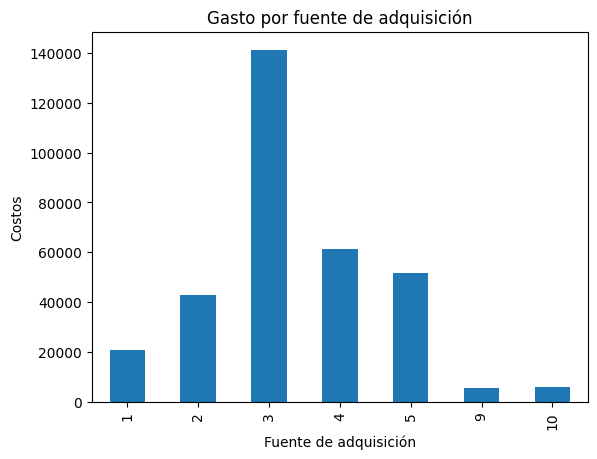

In [21]:
# Gráfico de gasto por fuente de adquisición
costs_by_source.plot(kind='bar', title='Gasto por fuente de adquisición', ylabel='Costos', xlabel='Fuente de adquisición')
plt.show()

b) Gasto a lo largo del tiempo:

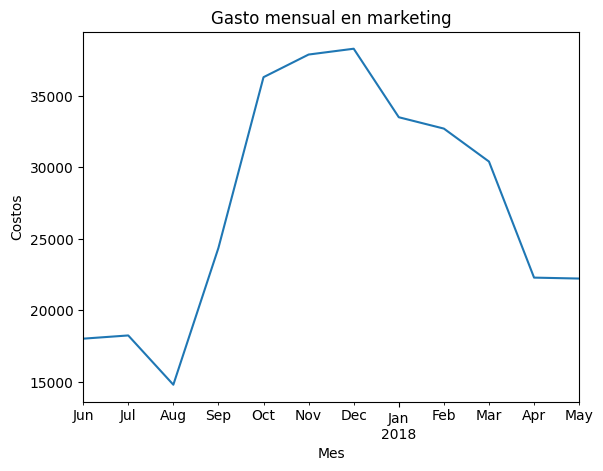

In [22]:
# Gráfico de gasto a lo largo del tiempo (mensual)
costs_by_month.plot(kind='line', title='Gasto mensual en marketing', ylabel='Costos', xlabel='Mes')
plt.show()

c) CAC por fuente de adquisición:

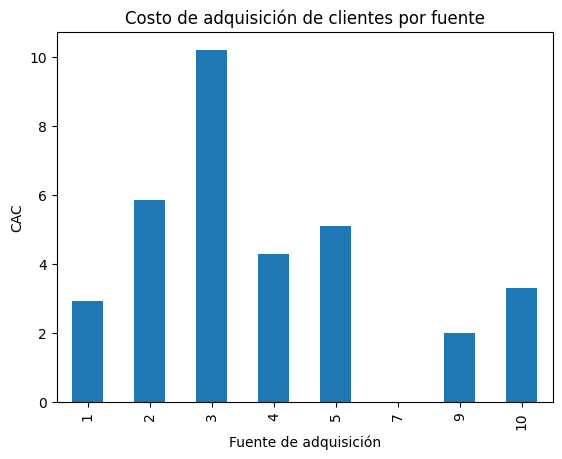

In [23]:
# Gráfico de CAC por fuente de adquisición
cac_by_source.plot(kind='bar', title='Costo de adquisición de clientes por fuente', ylabel='CAC', xlabel='Fuente de adquisición')
plt.show()

d) ROMI por fuente de adquisición:

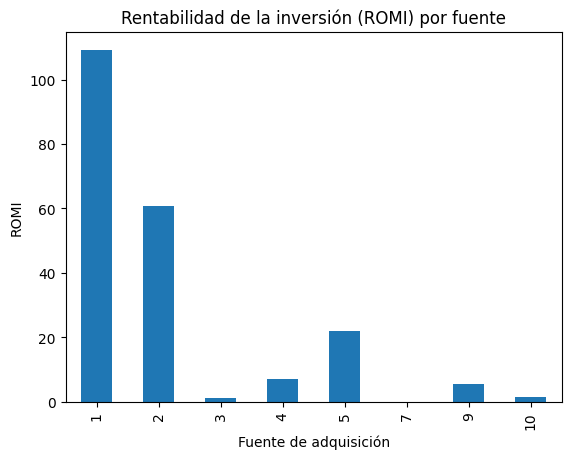

In [24]:
# Gráfico de ROMI por fuente de adquisición
romi_by_source.plot(kind='bar', title='Rentabilidad de la inversión (ROMI) por fuente', ylabel='ROMI', xlabel='Fuente de adquisición')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Los gráficos son una excelente adición a tu análisis. Has utilizado visualizaciones efectivas para mostrar el gasto, CAC y ROMI, lo que facilita la comprensión de las métricas. ¡Gran trabajo!
</div>



## Resultados del análisis

### Conclusiones

1. **Rentabilidad (ROMI)**:
   - La fuente **1** es la más rentable con un **ROMI** de **109.31**, lo que significa que cada dólar invertido en esta fuente genera $109.31 de retorno. Esta fuente es claramente la más efectiva y debería recibir una mayor proporción del presupuesto.
   - La fuente **2** también muestra un buen rendimiento con un **ROMI** de **60.63**, por lo que también es recomendable seguir invirtiendo en esta fuente.
   - Las fuentes **9** y **10** muestran un rendimiento más bajo en comparación, con **ROMI** de **5.58** y **1.51** respectivamente. Aunque siguen siendo positivas, su rentabilidad es significativamente menor que las fuentes líderes.

2. **Costo de Adquisición de Clientes (CAC)**:
   - La fuente **9** tiene el **CAC** más bajo (**1.97**), lo que sugiere que es bastante eficiente en términos de costos. Sin embargo, el **ROMI** de esta fuente no es tan alto en comparación con otras, lo que indica que, aunque adquiere clientes a bajo costo, no genera tantos ingresos.
   - La fuente **3** tiene un **CAC** elevado (**10.20**), pero su **ROMI** es bajo (**1.09**), lo que indica que no es una inversión eficiente. Esta fuente debería ser reconsiderada, y tal vez reducir su presupuesto.
   - Fuentes como **1** y **2** tienen un buen equilibrio entre el CAC y el ROMI, siendo tanto eficientes en términos de adquisición como rentables.

3. **Gastos por Fuente de Adquisición**:
   - La fuente **3** tiene el gasto más alto (más de **$140,000**), y como se mencionó anteriormente, su rendimiento en términos de ROMI es bajo. Se recomienda **reducir** la inversión en esta fuente y reasignar estos fondos a fuentes más rentables como **1** y **2**.
   - El gasto en las fuentes **1** y **2** parece estar bien justificado, dado que ambas tienen altos retornos de inversión.

4. **Gastos a lo largo del tiempo**:
   - El pico de gasto en el último trimestre de 2017 podría estar justificado si se tiene en cuenta el **LTV de 6.9 meses**, lo que sugiere que el retorno de esa inversión puede no haber sido plenamente reflejado en los ingresos de los primeros meses de 2018. Sin embargo, algunas fuentes como la fuente **3** parecen haber absorbido una gran parte del presupuesto sin mostrar un retorno inmediato significativo. Esto indica la necesidad de **monitorear** de cerca el rendimiento de esas inversiones a medida que los clientes adquiridos alcanzan su **LTV**, para **evaluar** si esa **fuente** debe seguir recibiendo una parte significativa del presupuesto o si es necesario reducir su inversión.

### Recomendaciones:

- **Reasignar el presupuesto de la fuente 3**: La fuente 3 absorbe una gran parte del gasto, pero no está generando un retorno proporcional. Este presupuesto debería reasignarse a fuentes más eficientes como **1**, **2**, o incluso **9**, que tienen un CAC más bajo.
- **Aumentar inversión en fuentes 1 y 2**: Estas fuentes generan los mayores retornos por cada dólar invertido. Una estrategia de inversión más agresiva en estas fuentes podría incrementar los ingresos de manera significativa.
- **Mantener la inversión moderada en la fuente 9**: Aunque no es tan rentable como las fuentes líderes, su bajo CAC indica que puede ser una fuente eficiente para atraer nuevos clientes a bajo costo.
- **Reducir la inversión en las fuentes 3 y 10**: Dado que estas fuentes muestran un **CAC alto** y un **ROMI bajo**, debería reconsiderarse la inversión en ellas o reducir significativamente su presupuesto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Las conclusiones y recomendaciones están bien fundamentadas y ofrecen una visión clara del rendimiento de las fuentes de adquisición. Has hecho un excelente trabajo al relacionar los datos de rentabilidad y costos con decisiones estratégicas. ¡Buen trabajo!
</div>


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class=“tocSkip”></a> ¡Excelente trabajo! 👏 Tu proyecto ha sido aprobado. Has demostrado un gran dominio de las herramientas y metodologías aplicadas. Sigue con el mismo entusiasmo en los próximos sprints, ¡estás haciendo un trabajo increíble! 🚀 </div>
